### Question

The regular trading session on the National Stock Exchange of India Ltd. (NSE) commences at 9:15 AM IST.  Find the time elapsed in minutes at 11.45 AM IST using the datetime module in Python. Also, list all the functions in the datetime Python module and submit the code.

In [1]:
# Importing necessary libraries
from datetime import datetime

In [2]:
# Defining start and end time
start_time = datetime(2019, 3, 31, 9, 15)
end_time = datetime(2019, 3, 31, 11, 45)

In [3]:
# Difference between two times in seconds
diff = end_time - start_time

In [4]:
# Converting seconds to minutes
diff_in_minutes = diff.seconds / 60

In [5]:
# Printing the result
print("Difference in minutes:", diff_in_minutes)

Difference in minutes: 150.0


In [6]:
# Listing all functions in datetime module
dir(datetime)

['__add__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 'astimezone',
 'combine',
 'ctime',
 'date',
 'day',
 'dst',
 'fold',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'isocalendar',
 'isoformat',
 'isoweekday',
 'max',
 'microsecond',
 'min',
 'minute',
 'month',
 'now',
 'replace',
 'resolution',
 'second',
 'strftime',
 'strptime',
 'time',
 'timestamp',
 'timetuple',
 'timetz',
 'today',
 'toordinal',
 'tzinfo',
 'tzname',
 'utcfromtimestamp',
 'utcnow',
 'utcoffset',
 'utctimetuple',
 'weekday',
 'year']

### Question

Use the data file named "Stock OHLC dataset.csv” and compute the following.   

- Calculate the daily logarithmic returns using the closing price of stock A and name the column as “Log_returns”.
- In the next step, create a column called “Cum_returns” and compute cumulative returns in this column.
- What is the cumulative return value on "1-Sep-2016"?

In [7]:
# Importing necessary library
import pandas as pd
import numpy as np

In [8]:
# Reading the data
data = pd.read_csv('Stock OHLC dataset.csv', index_col=0, parse_dates=True)

data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-06-01,1106.949951,1118.599976,1071.000000,1074.849976,1033.370483,879733
2012-06-04,1069.699951,1078.000000,1051.000000,1067.500000,1026.303955,548592
2012-06-05,1077.500000,1089.900024,1058.300049,1079.000000,1037.360229,605028
2012-06-06,1079.900024,1115.800049,1076.349976,1107.949951,1065.193115,925831
2012-06-07,1120.000000,1146.400024,1110.599976,1143.250000,1099.130859,984712


In [9]:
# Computing logarithmic returns
data['Log_returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

# Computing cumulative returns
data['Cum_returns'] = data['Log_returns'].cumsum()

In [10]:
# Cumulative returns on 1-Sep-2016
returns = data.loc['2016-9-1', 'Cum_returns']

In [11]:
# Printing cumulative returns
print('Cumulative returns on 1-Sep-2016 is', returns)

Cumulative returns on 1-Sep-2016 is 1.5787359562695884


### Question

Use the data file named "Stock OHLC dataset.csv” and perform the following computations for the Bollinger Bands trading strategy. 

- Compute the Bollinger bands using the 30-day window for rolling mean and rolling standard deviation. Use 1 standard deviation for the purpose.
- Buy when the price hits the lower Bollinger band and sell when the price hits the upper Bollinger band.
- Compute the Sharpe ratio of the daily returns.
- Plot the histogram of the daily returns.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Reading data
data = pd.read_csv('Stock OHLC dataset.csv', index_col=0, parse_dates=True)

In [2]:
# Calculate log returns
data['returns'] = np.log(data['Adj Close']/data['Adj Close'].shift(1))
data.dropna(inplace=True)

In [3]:
# Defining parameters
window = 30
sd = 1

In [4]:
# Computing moving average and standard deviation
data['moving_average'] = data['Close'].rolling(window=window, center=False).mean()
data['std_dev'] = data['Close'].rolling(window=window, center=False).std()

In [5]:
# Computing upper and lower bands
data['upper_band'] = data['moving_average'] + sd * data['std_dev']
data['lower_band'] = data['moving_average'] - sd * data['std_dev']

In [6]:
# Computing signals
data['long_entry'] = data.Close < data.lower_band   
data['long_exit'] = data.Close >= data.moving_average

data['positions_long'] = np.nan  
data.loc[data.long_entry, 'positions_long'] = 1  
data.loc[data.long_exit, 'positions_long'] = 0 

data.positions_long = data.positions_long.fillna(method='ffill')

data['short_entry'] = data.Close > data.upper_band   
data['short_exit'] = data.Close <= data.moving_average

data['positions_short'] = np.nan  
data.loc[data.short_entry, 'positions_short'] = -1  
data.loc[data.short_exit, 'positions_short'] = 0  

data.positions_short = data.positions_short.fillna(method='ffill')  

data['positions'] = data.positions_long + data.positions_short

In [7]:
# Calculate strategy returns
data['s_returns'] = data['returns'] * data['positions'].shift(1)

# Define risk free rate
rfr = 0.05

# Calculate daily sharpe ratio
sharpe_ratio = (data['s_returns'].mean() - (0.05/252)) / data['s_returns'].std()

print(f'Sharpe Ratio: {np.round(sharpe_ratio, 3)}')

Sharpe Ratio: -0.085


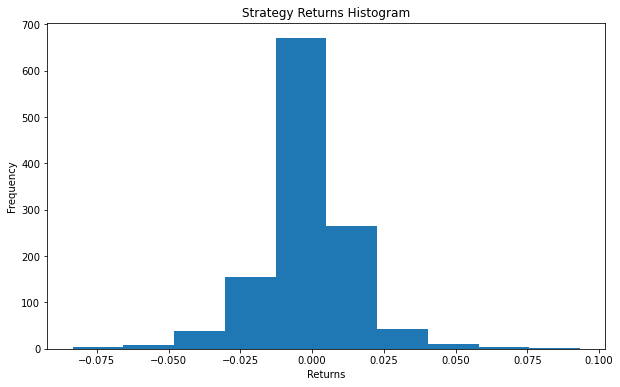

In [9]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data['s_returns'])
plt.title('Strategy Returns Histogram')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()

In [17]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,moving_average,std_dev,upper_band,lower_band,long_entry,long_exit,positions_long,short_entry,short_exit,positions_short,positions
Date,,,,,,,,,,,,,,,,,
2012-06-01,1106.949951,1118.599976,1071.000000,1074.849976,1033.370483,879733,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN,NaN
2012-06-04,1069.699951,1078.000000,1051.000000,1067.500000,1026.303955,548592,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN,NaN
2012-06-05,1077.500000,1089.900024,1058.300049,1079.000000,1037.360229,605028,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN,NaN
2012-06-06,1079.900024,1115.800049,1076.349976,1107.949951,1065.193115,925831,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN,NaN
2012-06-07,1120.000000,1146.400024,1110.599976,1143.250000,1099.130859,984712,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN,NaN


In [18]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,moving_average,std_dev,upper_band,lower_band,long_entry,long_exit,positions_long,short_entry,short_exit,positions_short,positions
Date,,,,,,,,,,,,,,,,,
2017-05-26,6971.149902,7085.049805,6936.200195,7064.799805,6994.833008,373937,6597.991650,287.995248,6885.986899,6309.996402,False,True,0.0,True,False,-1.0,-1.0
2017-05-29,7050.000000,7197.799805,7025.549805,7134.450195,7063.793945,427378,6633.208317,286.803722,6920.012039,6346.404595,False,True,0.0,True,False,-1.0,-1.0
2017-05-30,7134.450195,7206.600098,7084.149902,7147.500000,7076.714355,403698,6667.606657,284.451262,6952.057919,6383.155395,False,True,0.0,True,False,-1.0,-1.0
2017-05-31,7138.000000,7248.000000,7134.950195,7211.000000,7139.585449,650259,6703.401660,282.959519,6986.361179,6420.442141,False,True,0.0,True,False,-1.0,-1.0
2017-06-01,7242.000000,7245.000000,7110.100098,7146.600098,7075.823242,649217,6735.056657,277.413372,7012.470029,6457.643285,False,True,0.0,True,False,-1.0,-1.0


### Question

Use the data file named “ML dataset.csv” to compute the following. 

- Read the file and determine the dimensions of the dataset.
- Determine the data type of each attribute.
- Print the descriptive statistics of each attribute using the summary/describe function.
- Create a correlation matrix of the attributes in the dataset using the Pearson method for correlation.
- Print the sum of null values in each column.
- Count the values of each class in the 'class' column.
- Plot the scatter diagram of ATR5 and ATR10 columns and comment on the relationship between the tow.

In [11]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Reading data
data = pd.read_csv('ML dataset.csv', index_col=0, parse_dates=True)

In [12]:
# Printing dimensions of the dataset
print('Number of rows:', data.shape[0])
print('Number of cols:', data.shape[1])
print(data.shape)

Number of rows: 1214
Number of cols: 18
(1214, 18)


In [13]:
# Printing dimensions of the dataset
print('Number of rows:', data.shape[0])
print('Number of cols:', data.shape[1])
print(data.shape)

Number of rows: 1214
Number of cols: 18
(1214, 18)


In [14]:
# Determining type of attributes
print(data.info())
print('There are 17 attributes with float64 datatype.')
print('There is 1 attribute with object datatype.')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1214 entries, 17 to 1230
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       1214 non-null   object 
 1   forceindex  1214 non-null   float64
 2   WillR5      1214 non-null   float64
 3   WillR10     1214 non-null   float64
 4   WillR15     1214 non-null   float64
 5   RSI5        1214 non-null   float64
 6   RSI10       1214 non-null   float64
 7   RSI15       1214 non-null   float64
 8   ROC5        1214 non-null   float64
 9   ROC10       1214 non-null   float64
 10  MOM5        1214 non-null   float64
 11  MOM10       1214 non-null   float64
 12  ATR5        1214 non-null   float64
 13  ATR10       1214 non-null   float64
 14  MOM5Indx    1214 non-null   float64
 15  MOM10Indx   1214 non-null   float64
 16  ATR5Indx    1214 non-null   float64
 17  ATR10Indx   1214 non-null   float64
dtypes: float64(17), object(1)
memory usage: 180.2+ KB
None
There are 17

In [15]:
# Printing summary statistics
data.describe()

,forceindex,WillR5,WillR10,WillR15,RSI5,RSI10,RSI15,ROC5,ROC10,MOM5,MOM10,ATR5,ATR10,MOM5Indx,MOM10Indx,ATR5Indx,ATR10Indx
count,1.214000e+03,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000
mean,3.157205e+05,0.480002,0.472781,0.466182,51.529711,51.897565,52.073540,0.301217,0.612685,5.258814,10.786450,52.931422,52.931422,15.186862,30.524877,89.466231,89.466231
std,2.342857e+07,0.293066,0.292310,0.293381,29.277387,21.875439,18.322241,3.541756,4.927478,73.553308,100.965702,24.710524,24.710524,157.365731,217.733155,46.073076,46.073076
min,-2.328166e+08,0.000000,0.000000,0.000000,0.000000,1.327528,7.225744,-13.560261,-14.211622,-343.800100,-363.050100,12.350000,12.350000,-703.300300,-778.150400,21.850100,21.850100
25%,-5.751469e+06,0.202360,0.197971,0.195759,28.534233,35.617517,38.088055,-1.966600,-2.732109,-40.599900,-56.775075,36.112475,36.112475,-89.212525,-102.125250,57.712650,57.712650
50%,-5.483026e+05,0.463652,0.462233,0.452205,51.522771,51.419919,52.221574,0.239695,0.488869,5.100000,10.875000,47.900000,47.900000,18.949950,37.325200,79.074950,79.074950
75%,5.309741e+06,0.745289,0.728302,0.732369,76.832023,69.852690,67.101284,2.717683,3.993686,56.937500,81.262425,62.187500,62.187500,121.112425,175.412475,107.724975,107.724975
max,4.078364e+08,1.000000,1.000000,0.997530,100.000000,100.000000,94.566217,10.607285,16.030093,238.950200,290.750000,237.200000,237.200000,571.699700,674.799800,530.550300,530.550300


In [16]:
# Creating a correlation matrix
data.corr()

,forceindex,WillR5,WillR10,WillR15,RSI5,RSI10,RSI15,ROC5,ROC10,MOM5,MOM10,ATR5,ATR10,MOM5Indx,MOM10Indx,ATR5Indx,ATR10Indx
forceindex,1.000000,-0.412678,-0.339662,-0.303884,0.357413,0.305897,0.276801,0.320093,0.251744,0.314398,0.247175,0.070850,0.070850,0.136648,0.080135,-0.057653,-0.057653
WillR5,-0.412678,1.000000,0.835209,0.734449,-0.933309,-0.797332,-0.690268,-0.791307,-0.540686,-0.788210,-0.536755,0.026443,0.026443,-0.446717,-0.273976,0.082872,0.082872
WillR10,-0.339662,0.835209,1.000000,0.926230,-0.833387,-0.938769,-0.883894,-0.807477,-0.806595,-0.804255,-0.803524,0.032360,0.032360,-0.498628,-0.448303,0.107147,0.107147
WillR15,-0.303884,0.734449,0.926230,1.000000,-0.748188,-0.900484,-0.935354,-0.755964,-0.840614,-0.750622,-0.836533,0.037418,0.037418,-0.458984,-0.483095,0.129974,0.129974
RSI5,0.357413,-0.933309,-0.833387,-0.748188,1.000000,0.864280,0.753015,0.837686,0.585109,0.836387,0.580865,-0.056342,-0.056342,0.501886,0.333483,-0.112628,-0.112628
RSI10,0.305897,-0.797332,-0.938769,-0.900484,0.864280,1.000000,0.950765,0.847645,0.843627,0.846107,0.842360,-0.051042,-0.051042,0.517796,0.495299,-0.139371,-0.139371
RSI15,0.276801,-0.690268,-0.883894,-0.935354,0.753015,0.950765,1.000000,0.773091,0.894978,0.769355,0.892911,-0.045932,-0.045932,0.464875,0.524166,-0.151500,-0.151500
ROC5,0.320093,-0.791307,-0.807477,-0.755964,0.837686,0.847645,0.773091,1.000000,0.691361,0.985552,0.681343,-0.066524,-0.066524,0.560180,0.376148,-0.138639,-0.138639
ROC10,0.251744,-0.540686,-0.806595,-0.840614,0.585109,0.843627,0.894978,0.691361,1.000000,0.676933,0.985762,-0.055690,-0.055690,0.423116,0.578300,-0.141351,-0.141351
MOM5,0.314398,-0.788210,-0.804255,-0.750622,0.836387,0.846107,0.769355,0.985552,0.676933,1.000000,0.686072,-0.077278,-0.077278,0.570789,0.382038,-0.153102,-0.153102


In [17]:
# Print the sum of null values
data.isnull().sum()

class         0
forceindex    0
WillR5        0
WillR10       0
WillR15       0
RSI5          0
RSI10         0
RSI15         0
ROC5          0
ROC10         0
MOM5          0
MOM10         0
ATR5          0
ATR10         0
MOM5Indx      0
MOM10Indx     0
ATR5Indx      0
ATR10Indx     0
dtype: int64

In [19]:
# Count the values of each class in the 'class' column.
data['class'].value_counts()

DOWN    648
UP      566
Name: class, dtype: int64

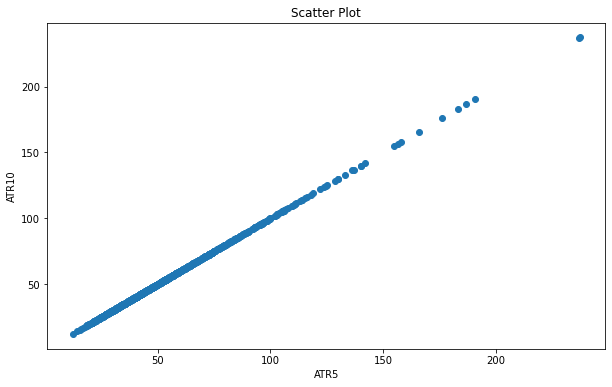

In [20]:
# Plot the scatter diagram of ATR5 and ATR10 columns and comment on the relationship between the two
plt.figure(figsize=(10, 6))
plt.scatter(data['ATR5'], data['ATR10'])
plt.xlabel('ATR5')
plt.ylabel('ATR10')
plt.title('Scatter Plot')
plt.show()

### Question

Use the data file named "Merged dataset.csv" which contains the daily Index value and the stock price. Compute the value of variance, covariance, and correlation over the given period.

In [25]:
# Importing necessary libraries
import pandas as pd

# Reading data
data = pd.read_csv('Merged dataset.csv', index_col=0, parse_dates=True)

In [26]:
# Computing variance
print('Variance of an index is', data.Index.var())
print('variance of a stock is', data.Stock.var())

Variance of an index is 253893.55704937296
variance of a stock is 533119.6488449955


In [27]:
# Computing covariance
print('Covariance of an index and a stock is\n', data.cov())

Covariance of an index and a stock is
                Index          Stock
Index  253893.557049  292532.676806
Stock  292532.676806  533119.648845


In [28]:
# Computing correlation
print('Correlation of an index and a stock is\n', data.corr())

Correlation of an index and a stock is
           Index     Stock
Index  1.000000  0.795126
Stock  0.795126  1.000000


### Question

Write a python code to compute the time taken to run the following piece of code

```python
import numpy as np

def func(x):
    return (pow(x, 4) + 4*pow(x, 3) + x*x + 3*x + 5)

lin_list = []
for x in np.linspace(-1000, 1000, 1000000):
    lin_list.append(func(x))
```

In [29]:
# Importing necessary libraries
import time
import numpy as np

# Defining function
def func(x):
    return (pow(x, 4) + 4*pow(x, 3) + x*x + 3*x + 5)

In [30]:
# Start time
start = time.time()

# Computation
lin_list = []
for x in np.linspace(-1000, 1000, 1000000):
    lin_list.append(func(x))

# End time
end = time.time()

print('Total time taken:', end - start, 'seconds.')

Total time taken: 2.5341451168060303 seconds.
